# mixture density networks 


- About density estimation: http://scikit-learn.org/stable/modules/density.html


- http://tullo.ch/articles/speeding-up-isotonic-regression/

We want to model the conditional distribution as a mixture of Gaussians, where each Gaussian component parameters are dependent on the input, that is 


\begin{equation}
P(y^m \mid x^m) = \sum_{k=1}^K \pi_k(x^m) \mathcal{N} \left( y^m \mid \mu_k(x^m) , \sigma_k^2(x^m) \right)
\end{equation}


In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

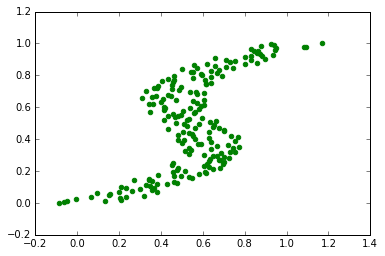

In [2]:
# generate some 1D regression data (reproducing Bishop book data, page 273). 
# Note that the P(y|x) is not a nice distribution.
# E.g. it has three modes for x ~= 0.5
N = 200
X = np.linspace(0,1,N)
Y = X + 0.3 * np.sin(2*3.1415926*X) + np.random.uniform(-0.1, 0.2, N)
X,Y = Y,X
plt.scatter(X,Y,color='g')

## About the model

Now we will present a mixture density network (MDN) with a single hidden layer. This model can be generalized using as many hidden layers as we want defined just like in a regular multilayer perceptron. The main difference between an standard MLP and a MDN is the output layer which will be specified in the following:

#### Weights

Let us assume we are training a MDN with $K$ Gaussian components and the objective is to build a density $P(t \mid x)$ where the target $t$ is a 1D variable (that is we are studying a 1D regression problem).

- First layer weights W1 defines a mapping from the input to the hidden layer.

- Second layer weights are composed by:

    - A weight matrix for the mixing coefficients $\pi_k$:  ```W_pi``` of shape ```(hidden_size, K)```
        
    - A weight matrix for the for the means of the Gaussian components $\mu_k$: ```W_mean``` of shape ```(hidden_size, K)```
    
    -  A weight matrix for the variances of the Gaussian components $\sigma_k^2$:  ```W_variance``` of shape ```(hidden_size, K)```

- Second layer biases are composed by:

    - A bias for the hidden layer: shape (hidden_size,1)
    
    - A bias for the mixing coefficients: shape (K,1)
    
    - A bias for the means of the Gaussian components: shape (K,1)
    
    - A bias for the variances of the Gaussian components: shape (K,1)


In [3]:
#from sklearn import utils, base
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils import check_array, check_X_y, column_or_1d
from sklearn.utils.extmath import safe_sparse_dot

In [4]:
help(safe_sparse_dot)

Help on function safe_sparse_dot in module sklearn.utils.extmath:

safe_sparse_dot(a, b, dense_output=False)
    Dot product that handle the sparse matrix case correctly
    
    Uses BLAS GEMM as replacement for numpy.dot where possible
    to avoid unnecessary copies.



In [5]:
np.random.randn(10,)

array([-0.47341557,  0.41513468, -0.13356943, -0.76384371, -0.01307134,
       -0.0244258 , -0.49759053, -2.34247365,  0.39002462, -0.88170606])

In [6]:
np.random.randn(5,1)

array([[ 1.28595195],
       [-0.88106161],
       [ 0.20511946],
       [-0.21702722],
       [-0.12272639]])

In [63]:
class MDNRegressor(BaseEstimator, RegressorMixin):

    
    """
    Mixture density network regression. This version assumes
        - A single layer of hidden units.
        - Target variable to be 1-dimensional
    
    hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 
       The ith element represents the number of neurons in the ith
       hidden layer.
       
    activation: {'tanh'}
    
    shuffle : bool, optional, default True
        Whether to shuffle samples in each iteration. 
        
    """
    
    def __init__(self,
                 hidden_layer_size,
                 n_components = 5,
                 activation="tanh",
                 batch_size= "auto",
                 shuffle=True):
        
        self.hidden_layer_size = hidden_layer_size
        self.n_components = n_components
        self.activation = activation
        self.batch_size = batch_size
        self.shuffle = shuffle
                
            
    def _initialize_in_fit(self, n_features, n_hidden, n_outputs, n_components):
        """
        Initialize the model weights and biases
        """
        scaling_factor = 0.1
        
        # n_outputs = y.shape[1]
        self.n_outputs_ = n_outputs
        
        # Initialize coefficient and intercept layers
        self.coefs_ = {"W_1": np.random.randn(n_features, n_hidden) * scaling_factor,
                       "W_variance": np.random.randn(n_hidden, n_components) * scaling_factor,
                       "W_mean": np.random.randn(n_hidden, n_components) * scaling_factor,
                       "W_mixing_coefficients":np.random.randn(n_hidden, n_components) * scaling_factor}
        
        self.intercepts_ = {"b_1":  np.zeros(n_hidden, ),
                            "b_variance": np.zeros(n_hidden, ),
                            "b_mean": np.zeros(n_hidden, ),
                            "b_mixing_coefficients":  np.zeros(n_hidden, )}
        

    def predict_statistics(self, X):
        """
        For each of the K components predicts
            - the expected value (mean of the Gaussian) for a given x
            - the variance of the prediction (variance of the Gaussian)
            - the weight or coefficient of the component
        """
        # compute hidden activation
        
        
    def _validate_hyperparameters(self):
        """
        Ensures hyperparameters are set correctly
        """
        if not isinstance(self.shuffle, bool):
            raise ValueError("shuffle must be either True or False, got %s." %
                             self.shuffle)       
    
    def _validate_input(self, X, y, incremental):
        
        if y.ndim == 2 and y.shape[1] == 1:
            y = column_or_1d(y, warn=True)
        return X,y
            
    def _forward_pass(self, X):
        activations = [X]
        
        
    def _fit(self, X, y):
        """
        Train the model
        """
        ###########
        # Prepare #
        ###########
        
        # Do stuff here
        hidden_layer_size = self.hidden_layer_size
        
        # Validate input parameters.
        self._validate_hyperparameters()
        if np.any(np.array(hidden_layer_size) <= 0):
            raise ValueError("hidden_layer_sizes must be > 0, got %s." %
                             hidden_layer_size)
            
        # Validate input
        X, y = self._validate_input(X, y, incremental=True)
        
        # Ensure y is 2D
        if y.ndim == 1:
            y = y.reshape((-1, 1))

            

        self.n_outputs_ = y.shape[1]
        
        n_features = X.shape[1]
        
        # Initialize model
        self._initialize_in_fit(n_features,
                                hidden_layer_size,
                                self.n_outputs_ ,
                                self.n_components)
        
        ###########
        # Train   #
        ###########
        
        
        ### Forward pass ###
        
        act_h1 = np.tanh( np.dot(X, self.coefs_["W_1"]) + self.intercepts_["b_1"]  )
        
        act_means = 
        act_variances = 
        act_mixture_coeff = 
        
        ### Compute gradients ###
        
        
        return self
                        
    def fit(self, X, y):
        return self._fit(X, y)

In [64]:
MDN =  MDNRegressor(hidden_layer_size=10)

In [65]:
X.shape, Y.shape

((200, 1), (200,))

In [66]:
X = X.reshape(-1,1)

In [67]:
X.shape, Y.shape

((200, 1), (200,))

In [68]:
MDN.fit(X,Y)

> <ipython-input-63-f1c590dc7750>(131)_fit()
-> return self
(Pdb) np.dot(X, self.coefs_["W_1"]).shape
(200, 10)
(Pdb) np.dot(X, self.coefs_["W_1"]) + self.intercepts_["b_1"]
array([[ 0.00339578, -0.00840269, -0.00056861, ..., -0.00355555,
         0.00258466, -0.00390758],
       [ 0.00238363, -0.00589818, -0.00039913, ..., -0.00249578,
         0.00181428, -0.00274289],
       [-0.00513246,  0.01270005,  0.00085941, ...,  0.00537395,
        -0.00390653,  0.00590603],
       ..., 
       [-0.03598199,  0.08903581,  0.00602502, ...,  0.03767495,
        -0.02738735,  0.04140518],
       [-0.03541653,  0.0876366 ,  0.00593034, ...,  0.03708289,
        -0.02695696,  0.04075449],
       [-0.04471425,  0.11064338,  0.0074872 , ...,  0.04681806,
        -0.03403382,  0.05145355]])
(Pdb) (np.dot(X, self.coefs_["W_1"]) + self.intercepts_["b_1"]).shape
(200, 10)
(Pdb) np.tanh( np.dot(X, self.coefs_["W_1"]) + self.intercepts_["b_1"]  )
array([[ 0.00339576, -0.00840249, -0.00056861, ..., -0.003

BdbQuit: 

In [34]:
n_hidden = 10
a = {"b_1":  np.zeros(n_hidden, 0)}

TypeError: data type not understood

In [39]:
a = {"b_1":  np.zeros(100, 0)}

TypeError: data type not understood

In [40]:
np.zeros(100, 0)

TypeError: data type not understood

In [43]:
np.zeros(100,)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])